In [5]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 10.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

問題３


In [18]:
# パラメータの設定
S0 = 100        # 初期株価
K = 100         # 行使価格
T = 1           # 満期（年数）
r = 0.01        # リスクフリーレート（無リスク金利）
sigma = 0.3     # ボラティリティ

# Black-Scholesの公式を計算する関数
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# コールオプション価格の計算
call_price = black_scholes_call(S0, K, T, r, sigma)
print("ヨーロッパ型コールオプションの価格:", call_price)

ヨーロッパ型コールオプションの価格: 12.368267463784079


In [25]:
def d(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

d1, d2 = d(S0, K, T, r, sigma)
print("d1:", d1)
print("d2:", d2)
print(norm.cdf(d1))
print(norm.cdf(d2))

print("e^(-0.01) =", np.exp(-0.01))


d1: 0.18333333333333335
d2: -0.11666666666666664
0.5727317593030405
0.45356210299507776
e^(-0.01) = 0.9900498337491681


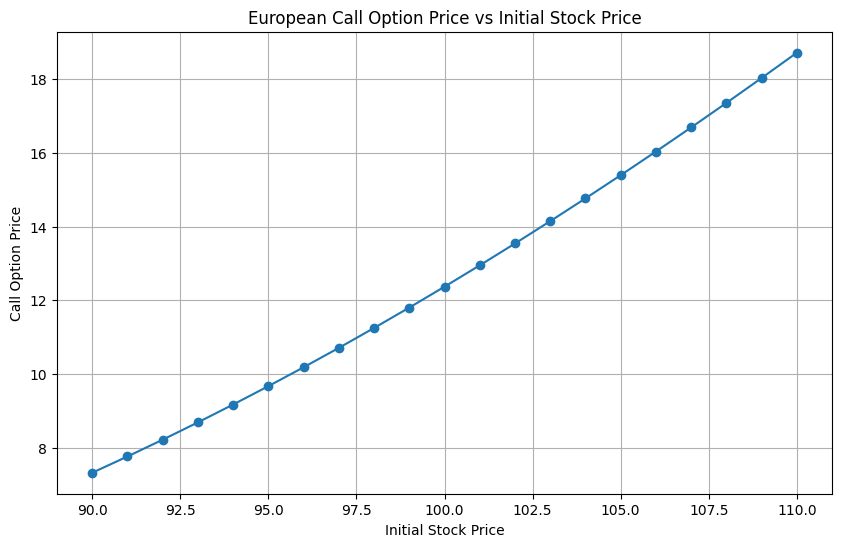

In [19]:
# 初期株価を90から110まで1刻みで変化
initial_prices = np.arange(90, 111, 1)
call_prices = [black_scholes_call(S0, K, T, r, sigma) for S0 in initial_prices]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(initial_prices, call_prices, marker='o')
plt.title("European Call Option Price vs Initial Stock Price")
plt.xlabel("Initial Stock Price")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()

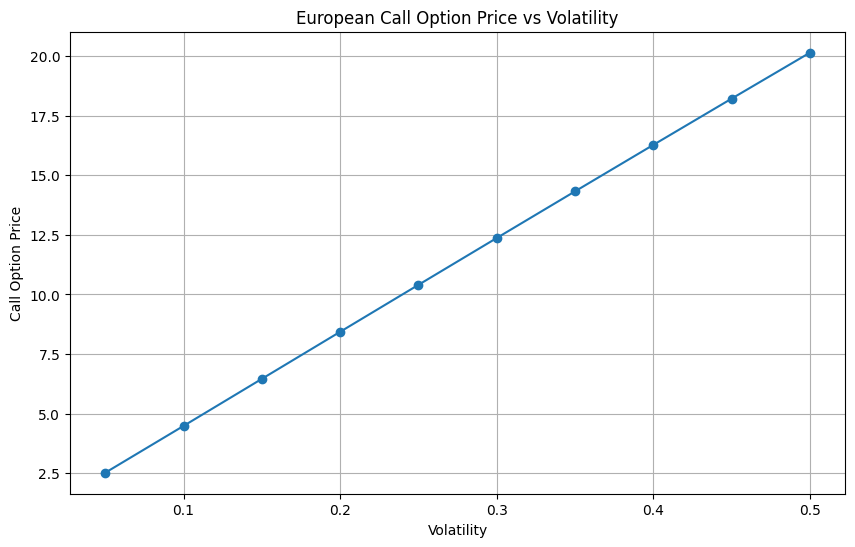

In [20]:
# ボラティリティを0.05から0.5まで0.05刻みで変化
volatilities = np.arange(0.05, 0.55, 0.05)
call_prices_volatility = [black_scholes_call(S0=100, K=K, T=T, r=r, sigma=sigma) for sigma in volatilities]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(volatilities, call_prices_volatility, marker='o')
plt.title("European Call Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()


問題４

In [37]:
# Excelファイルから特定のシートを読み込む
file_path = 'nikkei225.xlsx'
nikkei_data = pd.read_excel(file_path, sheet_name='日経平均株価 IDX101000000', skiprows=10)

# 列名を整理して、必要なデータ列を選択
nikkei_data.columns = ['Type', 'Date1', 'Date2', 'Nikkei_225']

nikkei_data.head()

,Type,Date1,Date2,Nikkei_225
0,日次(D),2022/10/13,2022/10/13,26237.42
1,日次(D),2022/10/14,2022/10/14,27090.76
2,日次(D),2022/10/17,2022/10/17,26775.79
3,日次(D),2022/10/18,2022/10/18,27156.14
4,日次(D),2022/10/19,2022/10/19,27257.38


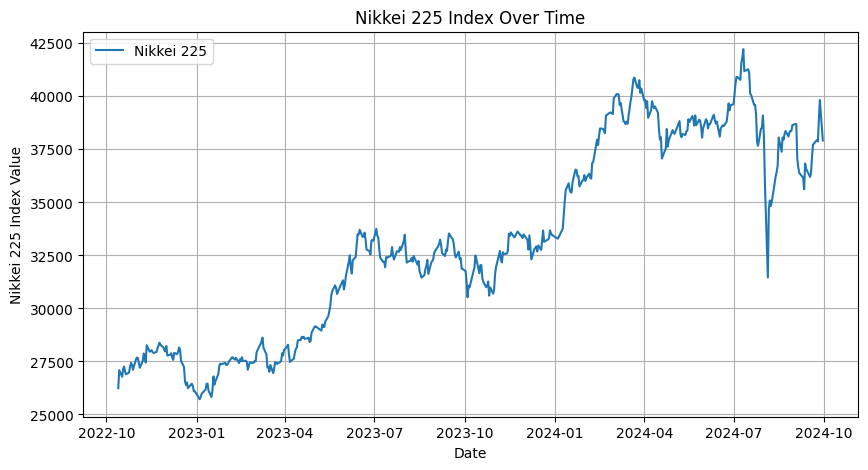

In [45]:
df = nikkei_data[['Date1', 'Nikkei_225']]

# 日付をdatetime型に変換し、Nikkei 225の値を数値型に変換
df['Date1'] = pd.to_datetime(df['Date1'], errors='coerce')
df['Nikkei_225'] = pd.to_numeric(df['Nikkei_225'], errors='coerce')

# NaNの行を削除して、データを整形
df = df.dropna().reset_index(drop=True)

# グラフをプロット
plt.figure(figsize=(10, 5))
plt.plot(df['Date1'], df['Nikkei_225'], label='Nikkei 225')
plt.xlabel('Date')
plt.ylabel('Nikkei 225 Index Value')
plt.title('Nikkei 225 Index Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
df.head()

,Date1,Nikkei_225
0,2022-10-13,26237.42
1,2022-10-14,27090.76
2,2022-10-17,26775.79
3,2022-10-18,27156.14
4,2022-10-19,27257.38


/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/626665948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Log_Returns'] = np.log(filtered_data['Nikkei_225'] / filtered_data['Nikkei_225'].shift(1))


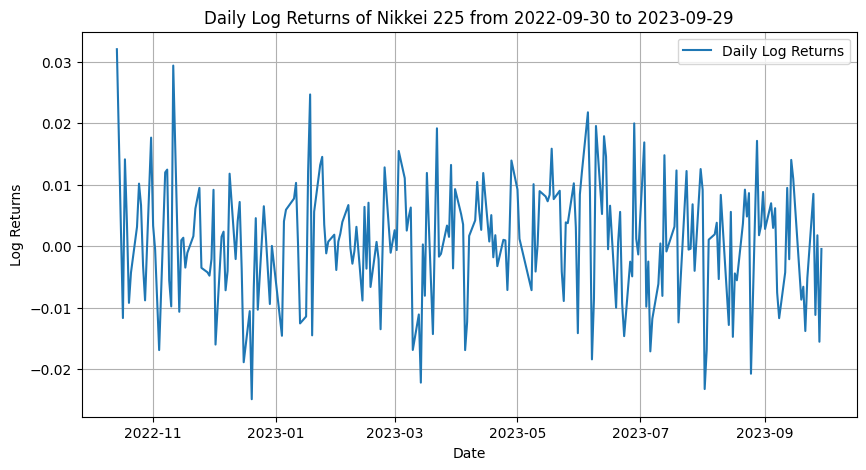

In [47]:
# 2022年9月30日から2023年9月29日までのデータをフィルタリング
start_date = '2022-09-30'
end_date = '2023-09-29'
filtered_data = df[(df['Date1'] >= start_date) & (df['Date1'] <= end_date)]

# 日次対数収益率を計算
filtered_data['Log_Returns'] = np.log(filtered_data['Nikkei_225'] / filtered_data['Nikkei_225'].shift(1))

# NaNを除去（最初の行にNaNが生じるため）
filtered_data = filtered_data.dropna().reset_index(drop=True)

# グラフのプロット
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['Date1'], filtered_data['Log_Returns'], label='Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Daily Log Returns of Nikkei 225 from 2022-09-30 to 2023-09-29')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# 日次対数収益率の平均を計算
average_log_return = filtered_data['Log_Returns'].mean()

# 年率の対数収益率を計算
annual_log_return = average_log_return * 247

print("年率の対数収益率:", annual_log_return)


年率の対数収益率: 0.20142950024622028


In [49]:
# 日次対数収益率の標準偏差を計算
std_log_return = filtered_data['Log_Returns'].std()

# 年率の標準偏差を計算
annualized_std_log_return = std_log_return * np.sqrt(247)

print("年率の標準偏差:", annualized_std_log_return)

年率の標準偏差: 0.15263010665364898


In [52]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Black-Scholesモデルを用いてヨーロピアン・コールオプション価格を計算

    Parameters:
    S (float): 現在の株価
    K (float): 行使価格
    T (float): 残存期間（年単位）
    r (float): リスクフリーレート（年率）
    sigma (float): ボラティリティ（年率）

    Returns:
    float: コールオプションの価格
    """
    # d1とd2の計算
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # コールオプション価格の計算
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# パラメータ設定
S = 100       # 現在の株価（例）
K = 105       # 行使価格（例）
T = 1         # 残存期間（1年）
r = 0.005     # リスクフリーレート（年率 0.5%）
sigma = 0.2   # ボラティリティ（例として20%）

# コールオプションの価格計算
call_price = black_scholes_call(S, K, T, r, sigma)
print("コールオプション価格:", call_price)


コールオプション価格: 6.0994378981917805


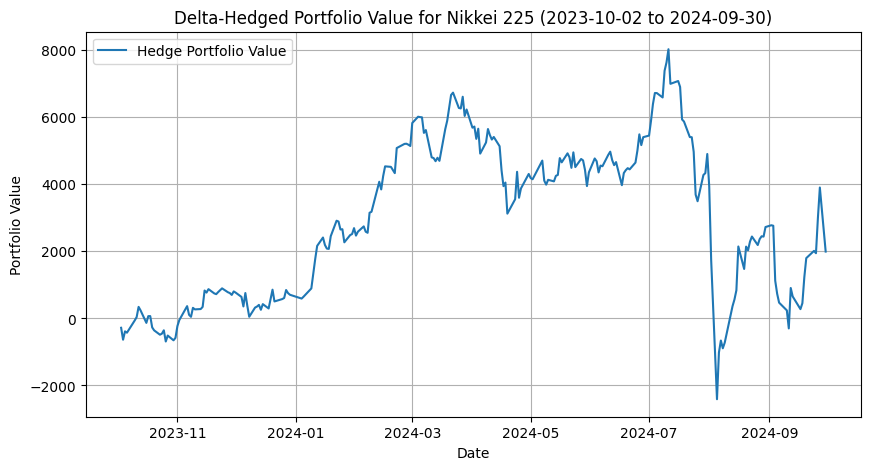

In [53]:
# Black-Scholesモデルのデルタを計算する関数
def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# ポートフォリオの価値を計算する関数
def calculate_hedge_portfolio_value(prices, K, r, sigma, T_days, delta_t):
    portfolio_values = []
    cash_position = 0
    num_shares_held = 0

    for i in range(len(prices) - 1):
        S = prices.iloc[i]
        T = (T_days - i) * delta_t

        # デルタの計算
        delta = black_scholes_delta(S, K, T, r, sigma)

        # ポートフォリオ調整
        shares_to_hold = delta
        shares_to_buy = shares_to_hold - num_shares_held
        cash_position -= shares_to_buy * S
        num_shares_held = shares_to_hold

        # ポートフォリオの価値を計算
        portfolio_value = num_shares_held * prices.iloc[i + 1] + cash_position * np.exp(r * delta_t)
        portfolio_values.append(portfolio_value)

    return portfolio_values

# データの読み込み
file_path = 'nikkei225.xlsx'
nikkei_data = pd.read_excel(file_path, sheet_name='日経平均株価 IDX101000000', skiprows=10)

# データの前処理
nikkei_data.columns = ['Type', 'Date1', 'Date2', 'Nikkei_225']
nikkei_data = nikkei_data[['Date1', 'Nikkei_225']]
nikkei_data['Date1'] = pd.to_datetime(nikkei_data['Date1'], errors='coerce')
nikkei_data['Nikkei_225'] = pd.to_numeric(nikkei_data['Nikkei_225'], errors='coerce')
nikkei_data = nikkei_data.dropna().reset_index(drop=True)

# 期間を指定してデータをフィルタリング
start_date = '2023-10-02'
end_date = '2024-09-30'
filtered_data = nikkei_data[(nikkei_data['Date1'] >= start_date) & (nikkei_data['Date1'] <= end_date)]
prices = filtered_data['Nikkei_225'].reset_index(drop=True)

# パラメータ設定
K = 32000       # 行使価格（例として32,000円）
r = 0.005       # リスクフリーレート（年率0.5%）
sigma = 0.2     # ボラティリティ（例として20%）
T_days = len(prices)  # 残存期間（日数）
delta_t = 1 / 247    # 日次に対応する年率

# ヘッジポートフォリオの価値を計算
portfolio_values = calculate_hedge_portfolio_value(prices, K, r, sigma, T_days, delta_t)

# グラフのプロット
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['Date1'].iloc[1:], portfolio_values, label='Hedge Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Delta-Hedged Portfolio Value for Nikkei 225 (2023-10-02 to 2024-09-30)')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Black-Scholesモデルを用いてヨーロピアン・コールオプションの価格を計算する関数
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# 満期の株価とオプションの理論価格
S_maturity = prices.iloc[-1]  # 満期の株価
T = 1 / 247  # 残存期間が満期で0に近づくため、小さい値に設定

# 満期におけるオプションの理論価格
option_price_maturity = black_scholes_call(S_maturity, K, T, r, sigma)

# 満期におけるポートフォリオの最終価値
portfolio_value_maturity = portfolio_values[-1]

# ヘッジ誤差を計算
hedge_error = portfolio_value_maturity - option_price_maturity
print("満期におけるヘッジ誤差:", hedge_error)


満期におけるヘッジ誤差: -3927.2615562697792
